###  Principal Component Analysis (PCA) on High-Dimensional Data

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# 1. Generate 4D synthetic dataset (3 classes) 
np.random.seed(42) 
X = np.vstack([ 
np.random.normal(0, 1, (50, 4)), 
np.random.normal(3, 1, (50, 4)), 
np.random.normal(-3, 1, (50, 4)) 
]) 
y = np.array([0]*50 + [1]*50 + [2]*50)

In [16]:
# 2. Standardize data 
X_scaled = StandardScaler().fit_transform(X) 

In [17]:
# 3. Function to perform PCA and print stats 
def apply_pca(X, n): 
    pca = PCA(n_components=n) 
    X_pca = pca.fit_transform(X) 
    retained = pca.explained_variance_ratio_.sum() 
    loss = 1 - retained 
    print(f"\n◆ 4D → {n}D | Variance Retained: {retained:.2f} | Loss: {loss:.2f}") 
    return X_pca


◆ 4D → 3D | Variance Retained: 0.97 | Loss: 0.03


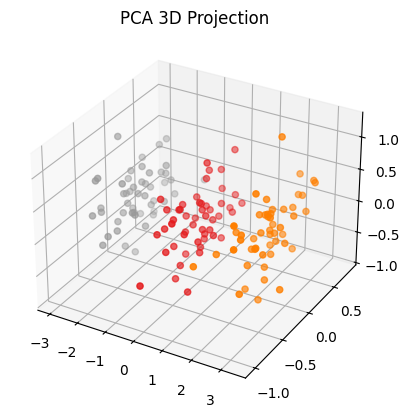

In [18]:
# 4. 3D PCA 
X_3d = apply_pca(X_scaled, 3) 
fig = plt.figure() 
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(X_3d[:,0], X_3d[:,1], X_3d[:,2], c=y, cmap='Set1') 
ax.set_title("PCA 3D Projection") 
plt.show() 


◆ 4D → 2D | Variance Retained: 0.94 | Loss: 0.06


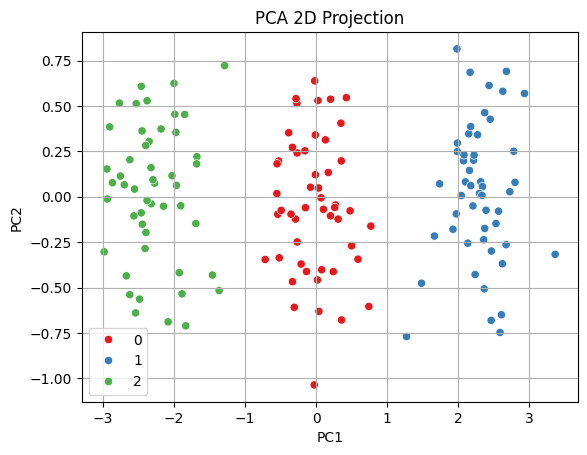

In [19]:
# 5. 2D PCA 
X_2d = apply_pca(X_scaled, 2) 
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], hue=y, palette='Set1') 
plt.title("PCA 2D Projection") 
plt.xlabel("PC1"); plt.ylabel("PC2") 
plt.grid(True) 
plt.show()


◆ 4D → 1D | Variance Retained: 0.91 | Loss: 0.09


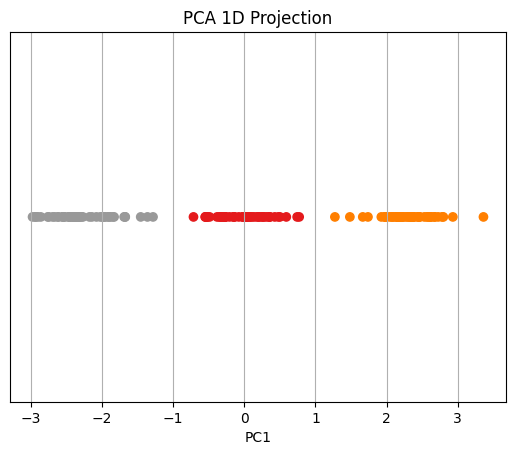

In [20]:
# 6. 1D PCA 
X_1d = apply_pca(X_scaled, 1) 
plt.scatter(X_1d[:, 0], [0]*len(X_1d), c=y, cmap='Set1') 
plt.title("PCA 1D Projection") 
plt.yticks([]); plt.xlabel("PC1")
plt.grid(True) 
plt.show()